DIPY N4 TUTORIAL 

Step 1: Import nibabel and model

In [1]:
import nibabel as nib
from dipy.nn.deepn4 import DeepN4

/home/local/VANDERBILT/kanakap/n4dipy/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-11 21:19:06.327405: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-11 21:19:06.330039: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 21:19:06.358056: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 21:19:06.358079: E external/local_xla/xla/stream_executor/cuda/cuda_

Step 2: Load the image and affine (required because we resample the images)

In [2]:
input_file = '/home/local/VANDERBILT/kanakap/deepN4_data/inputs_external_more/IXI_HH/IXI049-HH-1358-T1.nii.gz'
img_file = nib.load(input_file)
img = img_file.get_fdata()
img_affine = img_file.affine

Step 3: Call the model and load the pretrained weights 

In [3]:
model = DeepN4()
model.fetch_default_weights()

2024-03-11 21:19:16.027251: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Step 4: Predict the bias corrected image

In [4]:
bias_corrected_img = model.predict(img, img_affine)

1/1 [==============================] - 5s 5s/step


Step 5: Save the image

In [5]:
corrected_nii = nib.Nifti1Image(bias_corrected_img,img_affine)
nib.save(corrected_nii, '/nfs/masi/kanakap/projects/DeepN4/data/dipy_predict_output.nii')

Plot the results

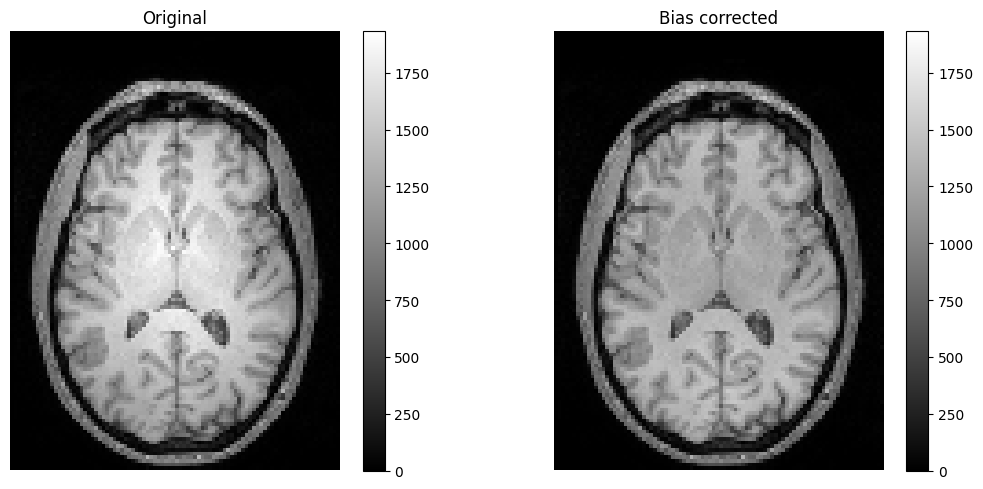

In [22]:
import matplotlib.pyplot as plt
import numpy as np

n = 70
original = np.rot90(np.squeeze(img[:, n, :]), 4)

mean_signal = np.mean(img); pmean_signal = np.mean(bias_corrected_img)
scaled_corrected = bias_corrected_img * (( mean_signal / pmean_signal ))
corrected = np.rot90(np.squeeze(scaled_corrected[:, n, :]), 4)

difference_img = bias_corrected_img - img
diff = np.rot90(np.squeeze(difference_img[:, n, :]), 4)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 3 columns

vmin = min(original.min(), corrected.min())
vmax = max(original.max(), corrected.max())
# Rotated image in grayscale
axs[0].imshow(original, cmap='gray', vmin=vmin, vmax=vmax)
axs[0].set_title('Original')
axs[0].axis('off')  # Hide axes for clarity

# Another image for comparison
axs[1].imshow(corrected, cmap='gray', vmin=vmin, vmax=vmax)
axs[1].set_title('Bias corrected')
axs[1].axis('off')  # Hide axes for clarity

plt.colorbar(axs[0].imshow(original, cmap='gray', vmin=vmin, vmax=vmax), ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(axs[1].imshow(corrected, cmap='gray', vmin=vmin, vmax=vmax), ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()  # Adjust layout to not overlap
plt.show()
